Import necessary libraries.

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

Get image file names

In [24]:
image_folder = os.path.abspath('01_own_test_data')
image_filenames = os.listdir(image_folder)
print(image_filenames)

['digit0.png', 'digit1.png', 'digit2.png', 'digit3.png', 'digit4.png', 'digit5.png', 'digit6.png', 'digit7.png', 'digit8.png', 'digit9.png']


Load in the own test data for model testing

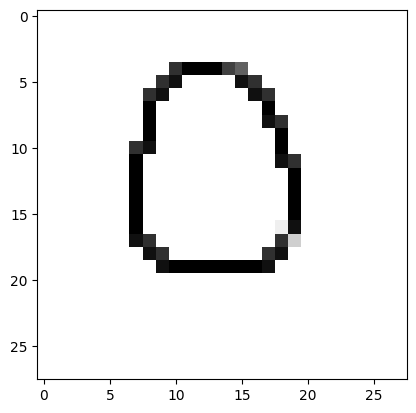

In [25]:
own_test_data = []
for filename in image_filenames:
    image_path = os.path.join(image_folder, filename)
    img = Image.open(image_path).convert('L')  
    img = img.resize((28, 28)) 
    img_array = np.array(img)
    img_array = img_array / 255.0  
    img_array = img_array[..., np.newaxis]  
    own_test_data.append(img_array)

own_test_data = np.array(own_test_data)

pixels = own_test_data[0].reshape((28, 28))
plt.imshow(pixels, cmap='binary')
plt.show()



Get MNIST data and plot

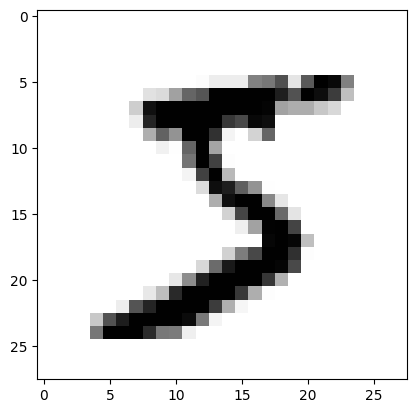

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

pixels = x_train[0].reshape((28, 28))
plt.imshow(pixels, cmap='binary')
plt.show()

Create and train model

In [27]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1338 - accuracy: 0.9593 - val_loss: 0.0782 - val_accuracy: 0.9758
Epoch 2/3
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 3/3
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0406 - val_accuracy: 0.9875


Get results

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - loss: 0.0327 - accuracy: 0.9894 - 860ms/epoch - 3ms/step
Test accuracy: 0.9894000291824341


Use own data to check prediction

In [31]:
prediction_number = 5
sample_to_predict = own_test_data[prediction_number]
sample_to_predict = np.expand_dims(sample_to_predict, axis=0)  # Convert to a batch of size 1

prediction = model.predict(sample_to_predict)
predicted_class = np.argmax(prediction)

print(f"This number is a {prediction_number} and my model thinks it's a {predicted_class}")

1/1 [==============================] - 0s 50ms/step
This number is a 5 and my model thinks it's a 2


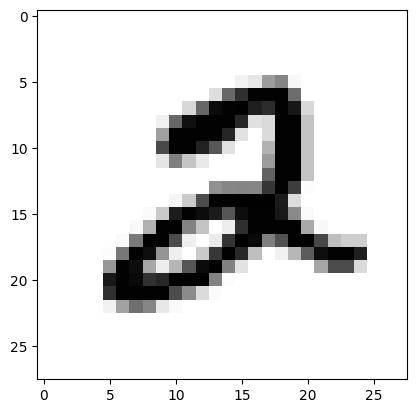

1/1 [==============================] - 0s 15ms/step
This number is a 5 and my model thinks it's a 2


In [32]:
prediction_number_index = 500
sample_to_predict = x_train[prediction_number]
sample_to_predict = np.expand_dims(sample_to_predict, axis=0)  # Convert to a batch of size 1

pixels = x_train[prediction_number].reshape((28, 28))
plt.imshow(pixels, cmap='binary')
plt.show()

prediction = model.predict(sample_to_predict)
predicted_class = np.argmax(prediction)

print(f"This number is a {prediction_number} and my model thinks it's a {predicted_class}")